# Corona Vaccine Distribution

# Introduction

## problem

# Initiation

In [111]:
# import module
import random
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### Individu

In [112]:
def create_individu(max):
    return [random.randint(i, max) for i in init_data]

### Population

In [113]:
def create_population(num_of_individu, max):
    return [create_individu(max) for i in range(num_of_individu)]

### Fitness Function

In [114]:
def fitness_value(individu, target):
    summed = sum(individu)
    return int(target-summed)

In [115]:
def calc_population_fitness(population, target):
    return [fitness_value(individu, target) for individu in population]

# Representation

## One Variable

## Two Variable

# Parent Selection

## Best Selection

In [116]:
def best_selection(population, target):
    pop_tuple = [(idv, fitness_value(idv, target)) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda pop: pop[1])  # sort by fitness
    # return 2 best individu
    best2 = []
    for idv in sorted_tuple:
        best2.append(idv[0])
    return best2[0:2]
    # return sorted_tuple[0:2] # untuk tampilan tuple('population', 'fitnes')

## Roulette

In [117]:
# roulete
def roulette(population, vaksin):
    '''
    aturan :
    jika telah terpilih 1 
    maka individu itu harus terdelete dari populasi untuk dilakukan roulete lagi
    '''
    pop = population.copy()
    selected = []
    for i in range(2):
        summed = sum(calc_population_fitness(pop, vaksin))
        point = random.randint(0, summed)
        total = 0
        for individu in pop:
            total = total + fitness_value(individu, vaksin)
            if point < total:
                selected.append(individu)
                pop.remove(individu) #hapus individu untuk roulete selanjutnya
    return selected
    

## Simple Tournamen

In [118]:
def simple_tournament(population, target):
    random_idv = random.sample(population, 2)
    idv1 = random_idv[0]
    idv2 = random_idv[1]
    if fitness_value(idv1, target) >= fitness_value(idv2, target):
        #population.remove(idv1)
        return idv1
    else:
        #population.remove(idv2)
        return idv2
    
def parent_from_tournamen(population, target):
    selected = []
    for i in range(2):
        p = simple_tournament(population, target)
        selected.append(p)
    return selected

# Crossover

## Uniform

In [119]:
def uniform(parent):
    treshold = 0.6
    papa = parent[0]
    mama = parent[1]
    temp_indv = []
    for i in range(len(papa)):
        temp_indv.append(round(random.uniform(0, 1), 1))

    # print(temp_indv)
    # swap process
    offspring = []
    for i, g in enumerate(temp_indv):
        if g >= treshold:
            # isi gen papa
            offspring.append(papa[i])
        elif g < treshold:
            # isi gen mama
            offspring.append(mama[i])
    return offspring

## Point Crossover

In [120]:
def point_xover(parent):
    papa = parent[0]
    mama = parent[1]
    point_line = random.randint(0,len(papa)-1)
    offspring = papa[:point_line] + mama[point_line:]
    return offspring

## Order Crossover

# Mutation

In [121]:
def mutate(offspring, validation_data, max_val, mut_chance=0.67):
    '''
    mutasikan individu baru dengan metode replace
    nilai replace = random
    posisi gen = random
    lakukan validasi dengan init_data sebelum return
    '''
    r = round(random.uniform(0, 1), 2)
    if mut_chance > r:
        posisi = random.randint(0, len(offspring)-1)
        offspring[posisi] = random.randint(validation_data[posisi], max_val)
        return offspring
    else:
        return offspring

# Natural Selection

## Replace Worst Individu

In [122]:
def replace_worst_individu(population, new_offspring, target):
    population.append(new_offspring)

    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda idv: idv[0])

    # tuple terakhir pasti fitnes terjelek
    sorted_tuple.pop()
    pop = []
    for idv in sorted_tuple:
        pop.append(idv[1])
    return pop

## Replace Worst Parent

In [123]:
def replace_worst_parent(population, parent, child, target):
    for idv in parent:
        idv_index = population.index(idv)
        population.pop(idv_index)
    
    #compare fitness parent and child
    parent_child_compare = [parent[0], parent[1], child]
    compare = [(fitness_value(idv, target), idv) for idv in parent_child_compare]
    sorted_compare = sorted(compare, key=lambda idv: idv[0])
    
    print('population setelah di remove parent',population)
    print('papa-mama-child', parent_child_compare)
    
    print('parent child compare', sorted_compare)
    #last individu in list will be remove either parent or child
    sorted_compare.pop()
    
    #append 2 individu in population
    for idv in sorted_compare:
        population.append(idv[1])
        
    #short all population
    pop = [(fitness_value(idv, target), idv) for idv in population]
    short_pop = sorted(pop, key=lambda idv: idv[0])
    return short_pop[1]

In [124]:
def print_natural_selection(population, target):
    '''
    return in tuple format (fitness, individu)
    '''
    # sorting population berdasarkan fitnes
    pop_tuple = [(fitness_value(idv, target), idv) for idv in population]
    sorted_tuple = sorted(pop_tuple, key=lambda x: x[0])
    return pop_tuple

# Run Code Together
*coba kombinasinya*

In [125]:
'''
percobaan
kombinasi = one variable + best selection + uniform crossover + mutation *replace + replace worst individu
generasi = 100
'''
init_data = [50, 23, 19, 47, 48]
vaksin = 266
max_val = 55
pop = create_population(10, max_val)
fitness = calc_population_fitness(pop, vaksin)


generation = pop
cur_best_fitness = 100
histori = []
i = 1
print('generasi awal', generation)
print('--------------------------')
while (cur_best_fitness >= 0 and i <= 100):
    # for i in range(1,80):
    print('ini generasi ke ', i)
    #hsl_selection = best_selection(generation, vaksin)
    #hsl_selection = roulette(generation, vaksin)
    hsl_selection = parent_from_tournamen(generation, vaksin)
    print('hasil selection', hsl_selection)
    #hsl_cross = uniform(hsl_selection)
    hsl_cross = point_xover(hsl_selection)
    print('hasil cross', hsl_cross)
    hsl_mutate = mutate(hsl_cross, init_data, max_val)
    print('hasil mutasi', hsl_mutate)
    hsl_replacement = replace_worst_individu(generation, hsl_mutate, vaksin)
    #hsl_replacement = replace_worst_parent(generation, hsl_selection, hsl_mutate, vaksin)
    print('populasi baru')
    print(hsl_replacement)
    print('fitnes with individu')
    print(print_natural_selection(hsl_replacement, vaksin))
    print('best fit and best individu in generation')
    print(print_natural_selection(hsl_replacement, vaksin)[0])
    print('--------------------------')

    # ambil fitnes terbaik setiap generasi
    best_fit, best_idv = print_natural_selection(hsl_replacement, vaksin)[0]
    if best_fit <= 0:
        break
    if best_fit < cur_best_fitness:
        cur_best_fitness = best_fit

    i += 1
    histori.append(best_fit)
    # reset generation dan isi dengan
    generation = hsl_replacement

generasi awal [[55, 44, 55, 48, 48], [50, 26, 20, 49, 53], [54, 48, 22, 54, 49], [50, 48, 31, 47, 54], [51, 30, 34, 48, 55], [54, 44, 27, 47, 54], [51, 30, 36, 50, 53], [50, 42, 42, 51, 53], [55, 26, 20, 52, 51], [55, 35, 27, 50, 49]]
--------------------------
ini generasi ke  1
hasil selection [[51, 30, 34, 48, 55], [55, 26, 20, 52, 51]]
hasil cross [51, 30, 20, 52, 51]
hasil mutasi [51, 31, 20, 52, 51]
populasi baru
[[55, 44, 55, 48, 48], [50, 42, 42, 51, 53], [50, 48, 31, 47, 54], [54, 48, 22, 54, 49], [54, 44, 27, 47, 54], [51, 30, 36, 50, 53], [51, 30, 34, 48, 55], [55, 35, 27, 50, 49], [51, 31, 20, 52, 51], [55, 26, 20, 52, 51]]
fitnes with individu
[(16, [55, 44, 55, 48, 48]), (28, [50, 42, 42, 51, 53]), (36, [50, 48, 31, 47, 54]), (39, [54, 48, 22, 54, 49]), (40, [54, 44, 27, 47, 54]), (46, [51, 30, 36, 50, 53]), (48, [51, 30, 34, 48, 55]), (50, [55, 35, 27, 50, 49]), (61, [51, 31, 20, 52, 51]), (62, [55, 26, 20, 52, 51])]
best fit and best individu in generation
(16, [55, 44,

# Plot

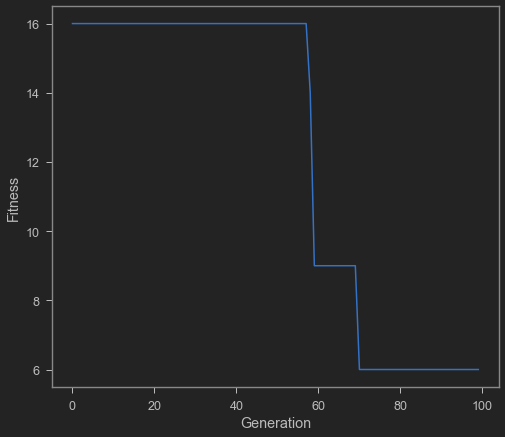

In [126]:
plt.plot(histori,marker='')
plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.show()